# Share of successful meetings

### At varying sentiment levels

Analysis of statistics of opinions, here: share of meetings that result in opinion changes ("successful meeetings"). How does this hsare change when sentiment bounds are varied, and the interaction with $\theta$. $\lambda$ is 0.5 (minimum variance treatment) in all the simulations that were considered here. There are no coherence features, so treatments with different values of $\gamma$ or $\kappa$ refer to independent simulation runs, rather than different parametrisations.

The figure portraying the meetings efficiency as a function of $\alpha$ appears in the left panel of Figure 6 in the paper. The relative increase in meetings efficiency between very low and high values of $\alpha$, as well as between no sentiment at all and full sentiment ($\alpha=0.0, 1.0$) as a function of $\theta$ (plots at the end of the notebook) are in Figure 7 of the paper.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import rc
rc('text', usetex=True)

make export folder if it doesn't exist yet

In [2]:
parent_path = os.path.join(os.getcwd(), "figures")

path = os.path.join(os.getcwd(), "figures\\successful_meetings")

if not os.path.exists(parent_path):
    os.mkdir(parent_path)
if not os.path.exists(path):
    os.mkdir(path)

### Data

Import (read) and organise data

In [3]:
### empty 4-dimensional arrays (one for each parameter)

# number of meetings
meet = np.full((21,9,9,9), np.nan)
# number of opinion changes
opc = np.full((21,9,9,9), np.nan)

# sentiment values
sents = ['00', '05'] + [str(i) for i in range(10, 101, 5)]

##### Dimensions - Parameters:
* **0: sentiment value** $\rightarrow \texttt{range(0.05, 0.95, 0.05)}$
* **1: theta** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$
* **2: gamma** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$
* **3: kappa** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$

$\gamma, \kappa$ are legacy parameters from other versions of the model. The data output is organised in the same way though, so it makes sense to treat it as if they existed.

Number of meetings

In [4]:
# loop through sentiment values, read data and store in appropriate position
for i, sent in enumerate(sents):
    with open(f'M1/K0G0T1-A300T1000M50S{sent}-n8/stats.txt') as f:
        for j, line in enumerate(f):
            meet[i][j%9][(j//9)%9][j//81] = float(line.split('\t')[3])

Number of opinion changes

In [5]:
# loop through sentiment values, read data and store in appropriate position
for i, sent in enumerate(sents):
    with open(f'M1/K0G0T1-A300T1000M50S{sent}-n8/stats.txt') as f:
        for j, line in enumerate(f):
            opc[i][j%9][(j//9)%9][j//81] = float(line.split('\t')[4])

In [6]:
# ratio of meetings that are successful
succ = opc / meet

# delete unnecessary arrays
del opc
del meet

In [7]:
sns.set_style('whitegrid')

l = '$\lambda$'
th = '$\\theta$'
g = '$\gamma$'
k = '$\kappa$'

### Effects of sentiment

#### Unconditional 

The effects of sentiment on the share of meetings that result in opinion changes. Averaged over $\theta$, $\gamma$, $\kappa$, while $\lambda$ is held constant at 0.5 (min variance treatment). 

Opinion changes are divided by two in order to account for the fact that there are always two agents per meeting that have the option to adjust their opinions or not

In [8]:
# divide by 2 because there are two that can change opinions
n = len(succ[0,:,:,:].flatten())
succ_sent = np.array([succ[i,:,:,:].mean() for i in range(21)])
sc_snt_er = np.array([np.std(succ[i,:,:,:].flatten()) / np.sqrt(n) for i in range(21)])

<IPython.core.display.Javascript object>


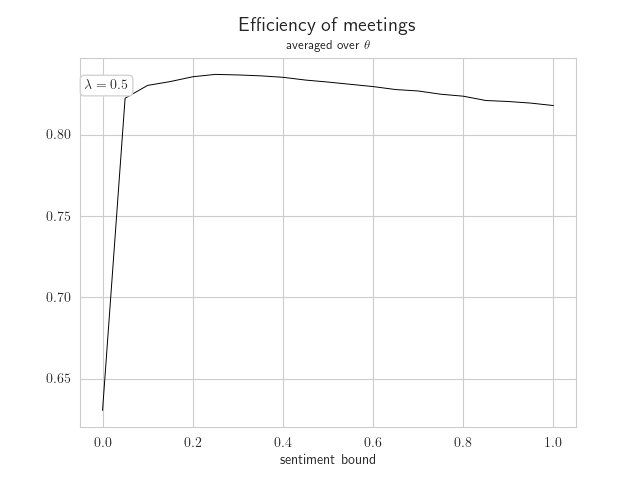

In [9]:
x = [int(sent) / 100 for sent in sents]

plt.figure()
plt.title(f'\Large{{Efficiency of meetings}} \n \small{{averaged over {th}}}')
plt.xlabel('sentiment bound')

plt.plot(x, succ_sent, c='black', lw=0.7)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.009, 0.915, '$\lambda=0.5$', transform=ax.transAxes, bbox=props)

plt.savefig('figures/successful_meetings/succ_meet_sentiment.png')

<IPython.core.display.Javascript object>


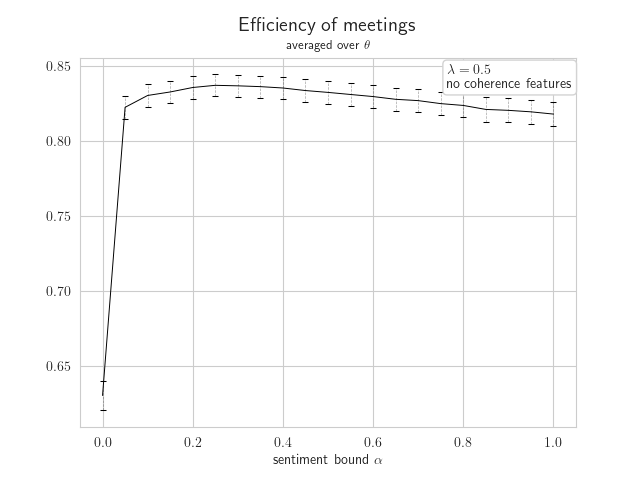

In [10]:
x = [int(sent) / 100 for sent in sents]

plt.figure()
plt.title(f'\Large{{Efficiency of meetings}} \n \small{{averaged over {th}}}')
plt.xlabel('sentiment bound $\\alpha$')

eb = plt.errorbar(x, succ_sent, sc_snt_er, c='black', lw=0.7, 
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.74, 0.9175, '$\lambda=0.5$ \n no coherence features', transform=ax.transAxes, bbox=props)

plt.savefig('figures/successful_meetings/succ_meet_sentiment_erbar_nocred.png')

Same figure, but with a broken y-axis, to accommodate the large jump between $\alpha=0$ and $\alpha=0.05$.

<IPython.core.display.Javascript object>


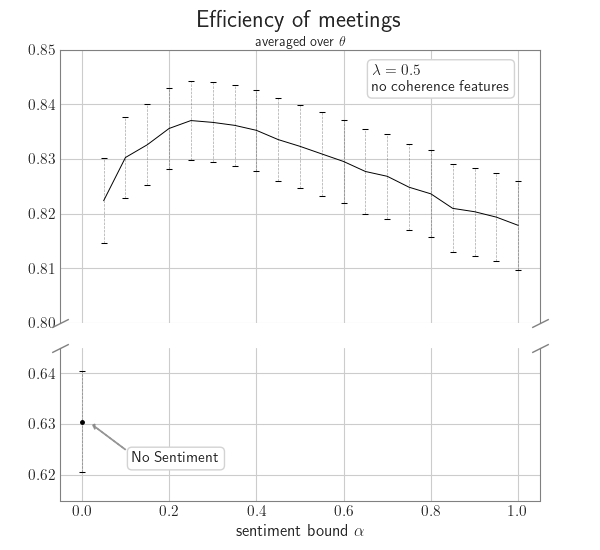

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
x1 = x[0]
x2 = x[1:]
y1 = succ_sent[0]
y2 = succ_sent[1:]
er1 = sc_snt_er[0]
er2 = sc_snt_er[1:]


# create figure with two separate axes objects
dy = 0.0875 # change in cut-off/break of y-axis
fig = plt.figure(figsize=(6,5.5))
ax1 = fig.add_axes([0.1, 0.325+dy, 0.8, 0.585-dy])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.19+dy], sharex=ax1)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax1.spines.right.set_color('grey')
ax1.spines.left.set_color('grey')
ax1.spines.top.set_color('grey')

ax2.spines.top.set_visible(False)
ax2.spines.right.set_color('grey')
ax2.spines.left.set_color('grey')
ax2.spines.bottom.set_color('grey')

ax1.tick_params('both', labelbottom=False, length=0, labelsize=11)
ax2.tick_params('both', length=0, labelsize=11)
ax2.set_xticks(np.arange(0, 1.1, 0.2))

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, lw=.7,
              linestyle="none", mec='grey', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], c='grey', transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], c='grey', transform=ax2.transAxes, **kwargs)

ax1.grid(which='major', zorder=0.1)
ax2.grid(which='major', zorder=0.1)

# plotting
eb1 = ax2.errorbar(x1, y1, er1, c='black', zorder=2.5, marker='o', markersize=2.5,
                   elinewidth=0.5, capsize=2, capthick=0.75)
eb1[-1][0].set_linestyle('--')
eb1[-1][0].set_alpha(0.35)
eb2 = ax1.errorbar(x2, y2, er2, linewidth=0.7, c='black', zorder=2.5,
                   elinewidth=0.5, capsize=2, capthick=0.75)
eb2[-1][0].set_linestyle('--')
eb2[-1][0].set_alpha(0.35)

ax1.set_ylim(0.8, 0.85)
ax2.set_ylim(0.615, 0.645)

plt.suptitle(f'\LARGE{{Efficiency of meetings}} \n \\normalsize{{averaged over {th}}}')
plt.text(0.65, 0.85, '$\lambda=0.5$ \n no coherence features', transform=ax1.transAxes, bbox=props, fontsize=11)
plt.text(0.15, 0.25, 'No Sentiment', transform=ax2.transAxes, bbox=props, fontsize=11)

ax2.arrow(0.1, 0.625, -0.07, 0.0045, width=0.0001, head_length=0.005,
          head_width=0.001, color='grey', alpha=0.75)

ax2.set_xlabel('sentiment bound $\\alpha$', fontsize=12)

plt.savefig('figures/successful_meetings/succ_meet_sentiment_erbar_brokenaxis_nocred.png')
plt.savefig('figures/successful_meetings/succ_meet_sentiment_erbar_brokenaxis_nocred.eps')

#### Conditional: $\theta$

In [12]:
# colormap for different values of variables that sentiment is conditioned on
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, 9))

In [13]:
succ_sent_t = np.array([[succ[i,j,:,:].mean() for i in range(21)]for j in range(9)])

<IPython.core.display.Javascript object>


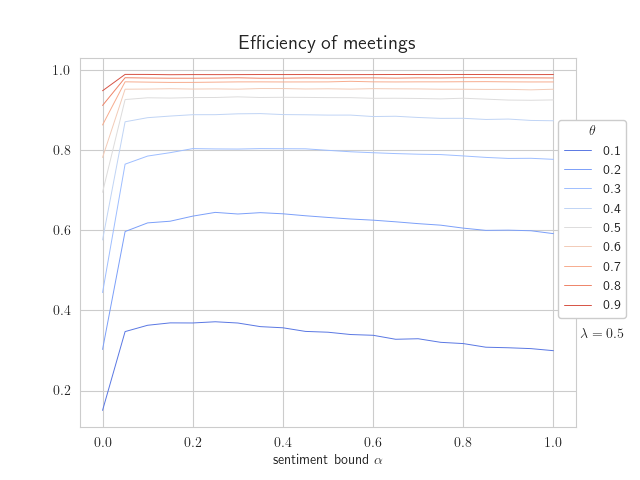

In [14]:
plt.figure()
plt.title(f'\Large{{Efficiency of meetings}}')
plt.xlabel('sentiment bound $\\alpha$')

for i in range(9):
    plt.plot(x, succ_sent_t[i], c=cmap[i], lw=0.7, label=(i+1)/10)
    
plt.legend(title=th, bbox_to_anchor=(0.95, 0.85), framealpha=1)

# textbox
ax = plt.gca()
plt.text(1.009, 0.24, '$\lambda=0.5$', transform=ax.transAxes)

plt.savefig('figures/successful_meetings/succ_meet_sentiment_theta.png')

<IPython.core.display.Javascript object>


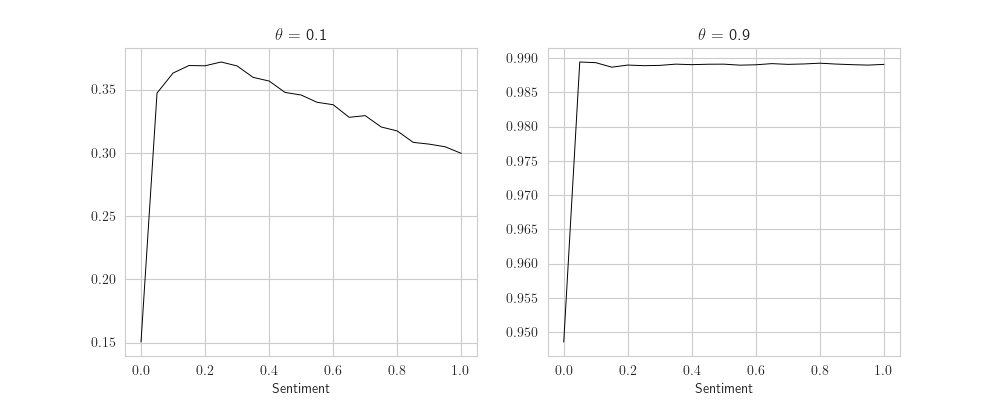

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax1.plot(x, succ_sent_t[0], c='black', lw=0.7)
ax1.set_title(f'{th} = 0.1')
ax1.set_xlabel('Sentiment')

ax2.plot(x, succ_sent_t[-1], c='black', lw=0.7)
ax2.set_title(f'{th} = 0.9')
ax2.set_xlabel('Sentiment')

plt.savefig('figures/successful_meetings/succ_meet_sentiment_theta_low_and_high.png')

In [16]:
for i in range(9):
    inc = round((succ_sent_t[i,-1] / succ_sent_t[i,0]) -1,4) *100
    print(f'At theta={(i+1)/10}, the relative increase of successful meetings is {inc}%.')

At theta=0.1, the relative increase of successful meetings is 99.06%.
At theta=0.2, the relative increase of successful meetings is 95.57%.
At theta=0.3, the relative increase of successful meetings is 74.82%.
At theta=0.4, the relative increase of successful meetings is 51.66%.
At theta=0.5, the relative increase of successful meetings is 33.18%.
At theta=0.6, the relative increase of successful meetings is 21.8%.
At theta=0.7, the relative increase of successful meetings is 12.45%.
At theta=0.8, the relative increase of successful meetings is 7.53%.
At theta=0.9, the relative increase of successful meetings is 4.2700000000000005%.


### Relative increase of meetings efficiency

These numbers looked quite nice, so I decided to plot them too. Results were quite intriguing, so some of the figures below found their way into the paper.

In [17]:
succ_sent0 = succ[0,:,:,:]
succ_sent5 = succ[1,:,:,:]
succ_sent95 = succ[-2,:,:,:]
succ_sent100 = succ[-1,:,:,:]

rel_inc_5_95 = ((succ_sent95 / succ_sent5) - 1 ) * 100
rel_inc_0_100 = ((succ_sent100 / succ_sent0) - 1 ) * 100
del succ_sent5, succ_sent95, succ_sent0, succ_sent100

In [18]:
n = len(rel_inc_5_95[0,:,:].flatten()) # 81, all combos of kappa and gamma
rel_inc_t595 = np.array([rel_inc_5_95[i,:,:].mean() for i in range(9)])
rel_inc_t_er595 = np.array([np.std(rel_inc_5_95[i,:,:].flatten()) / np.sqrt(n) for i in range(9)])

<IPython.core.display.Javascript object>


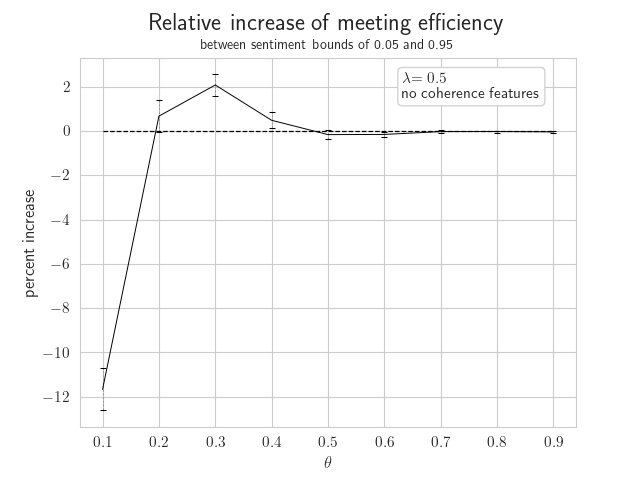

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
plt.figure()
plt.title(
    f'''
    \LARGE{{Relative increase of meeting efficiency}}  
    \\normalsize{{between sentiment bounds of 0.05 and 0.95}}''',
    x = 0.5, y=1
    )
eb = plt.errorbar([(i+1)/10 for i in range(9)], rel_inc_t595, rel_inc_t_er595, lw=0.7, c='black', 
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xlabel(th, fontsize=12)
plt.ylabel('percent increase', fontsize=12)

plt.hlines(0, 0.1, 0.9, colors='black', ls='--', lw=0.9)

# textbox
ax = plt.gca()
ax.tick_params(axis='both', labelsize=11)
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.65, 0.89, f'{l}$=0.5$ \n no coherence features', transform=ax.transAxes, bbox=props, fontsize=11)

plt.savefig('figures/successful_meetings/rel_increase_succ_meet_over_theta_erbar_5_95.png')
plt.savefig('figures/successful_meetings/rel_increase_succ_meet_over_theta_erbar_5_95_nocred.eps')

<IPython.core.display.Javascript object>


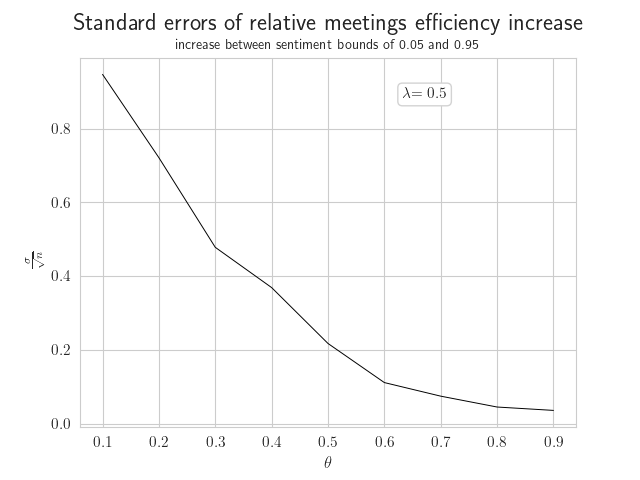

In [20]:
# plot only errors of plot above:
plt.figure()
plt.title(
    f'''\LARGE{{Standard errors of relative meetings efficiency increase}} 
    \\normalsize{{increase between sentiment bounds of 0.05 and 0.95}}''',
    x = 0.5, y=1
    )
plt.plot([(i+1)/10 for i in range(9)], rel_inc_t_er595, c='black', lw=0.7)
plt.xlabel(th, fontsize=12)
plt.ylabel('$\\frac{\sigma}{\sqrt{n}}$',y=0.45, fontsize=12)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.65, 0.89, f'{l}$=0.5$', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)


plt.savefig('figures/successful_meetings/rel_efficiency_increase_errors595.png')

#### Between sentiment values 0 and 1

In [21]:
n = len(rel_inc_0_100[0,:,:].flatten()) # 81, all combos of kappa and gamma
rel_inc_t01 = np.array([rel_inc_0_100[i,:,:].mean() for i in range(9)])
rel_inc_t_er01 = np.array([np.std(rel_inc_0_100[i,:,:].flatten()) / np.sqrt(n) for i in range(9)])

<IPython.core.display.Javascript object>


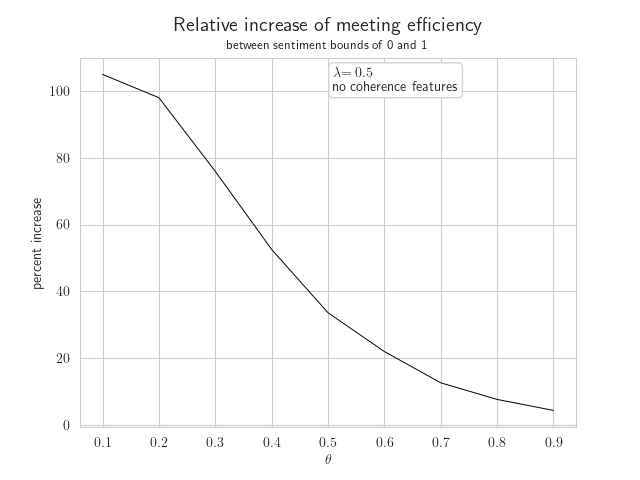

In [22]:
plt.figure()
plt.title(
    f'''
    \Large{{Relative increase of meeting efficiency}}  
    \small{{between sentiment bounds of 0 and 1}}''',
    x = 0.5, y=1
    )
plt.plot([(i+1)/10 for i in range(9)], rel_inc_t01, lw=0.7, c='black')

plt.xlabel(th)
plt.ylabel('percent increase')

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.51, 0.91, f'{l}$=0.5$ \n no coherence features', transform=ax.transAxes, bbox=props)

plt.savefig('figures/successful_meetings/rel_increase_succ_meet_over_theta_1_100.png')


<IPython.core.display.Javascript object>


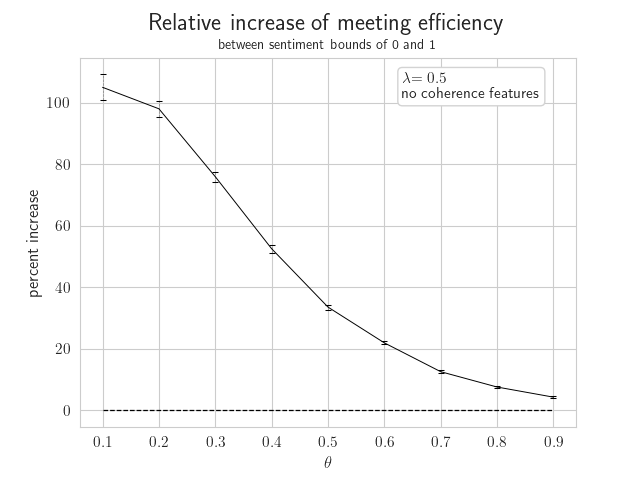

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [23]:
plt.figure()
plt.title(
    f'''
    \LARGE{{Relative increase of meeting efficiency}}  
    \\normalsize{{between sentiment bounds of 0 and 1}}''',
    x = 0.5, y=1
    )
eb = plt.errorbar([(i+1)/10 for i in range(9)], rel_inc_t01, rel_inc_t_er01, lw=0.7, c='black', 
                  elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

plt.xlabel(th, fontsize=12)
plt.ylabel('percent increase', fontsize=12)

plt.hlines(0, 0.1, 0.9, colors='black', ls='--', lw=0.9)

# textbox
ax = plt.gca()
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.65, 0.89, f'{l}$=0.5$ \n no coherence features', transform=ax.transAxes, bbox=props, fontsize=11)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('figures/successful_meetings/rel_increase_succ_meet_over_theta_erbar_0_100.png')
plt.savefig('figures/successful_meetings/rel_increase_succ_meet_over_theta_erbar_0_100_nocred.eps')

<IPython.core.display.Javascript object>


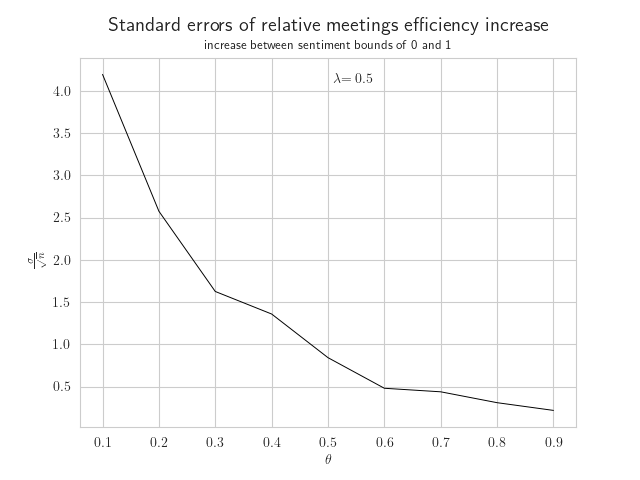

In [24]:
# plot only errors of plot above:
plt.figure()
plt.title(
    f'''\Large{{Standard errors of relative meetings efficiency increase}} 
    \small{{increase between sentiment bounds of 0 and 1}}''',
    x = 0.5, y=1
    )
plt.plot([(i+1)/10 for i in range(9)], rel_inc_t_er01, c='black', lw=0.7)
plt.xlabel(th)
plt.ylabel('$\\frac{\sigma}{\sqrt{n}}$',y=0.45)

# textbox
ax = plt.gca()
plt.text(0.51, 0.93, f'{l}$=0.5$', transform=ax.transAxes)

plt.savefig('figures/successful_meetings/rel_efficiency_increase_errors01.png')

Even the standard errors seem to follow a quite regular pattern!